In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator  # interval in axis of charts
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import warnings

%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings('ignore')

In [2]:
import os

for dirname, _, filenames in os.walk('input/'):
    for filename in filenames:
        print(f'./{dirname}/{filename}')

./input/real_estate_price_prediction_moscow/sample_submission.csv
./input/real_estate_price_prediction_moscow/test.csv
./input/real_estate_price_prediction_moscow/train.csv


In [3]:
TRAIN_DATASET_PATH = './input/real_estate_price_prediction_moscow/train.csv'
TEST_DATASET_PATH = './input/real_estate_price_prediction_moscow/test.csv'

In [4]:
train_df = pd.read_csv(TRAIN_DATASET_PATH, sep=',')
train_df.head(3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850


In [5]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [6]:
test_df = pd.read_csv(TEST_DATASET_PATH, sep=',')
test_df.head(3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B


In [7]:
print(f'Strings in train: {train_df.shape[0]}')
print(f'Strings in test: {test_df.shape[0]}')

Strings in train: 10000
Strings in test: 5000


In [8]:
# check the number of columns (train have col=Price --> target)
train_df.shape[1] - test_df.shape[1] == 1

True

In [9]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [10]:
# type conversion
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

In [11]:
def chart_scatter_standart(feature_1, feature_2, title='', x_locator=20, y_locator=50):
    plt.figure(figsize=(16, 8))
    plt.scatter(train_df[feature_1], train_df[feature_2], s=5, color='darkred')
    plt.tick_params(axis='both',which='major',labelsize=14, color='red')
    ax=plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(x_locator))
    ax.yaxis.set_major_locator(MultipleLocator(y_locator))
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.title(title, fontsize=18)
    plt.grid(color='lavender')
    plt.show()

### 1. EDA

In [12]:
# error corection in titles and delete id исправление ошибок
train_df.rename(columns={'Helthcare_2': 'Healthcare_2'}, inplace=True)        
train_df.head(3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850


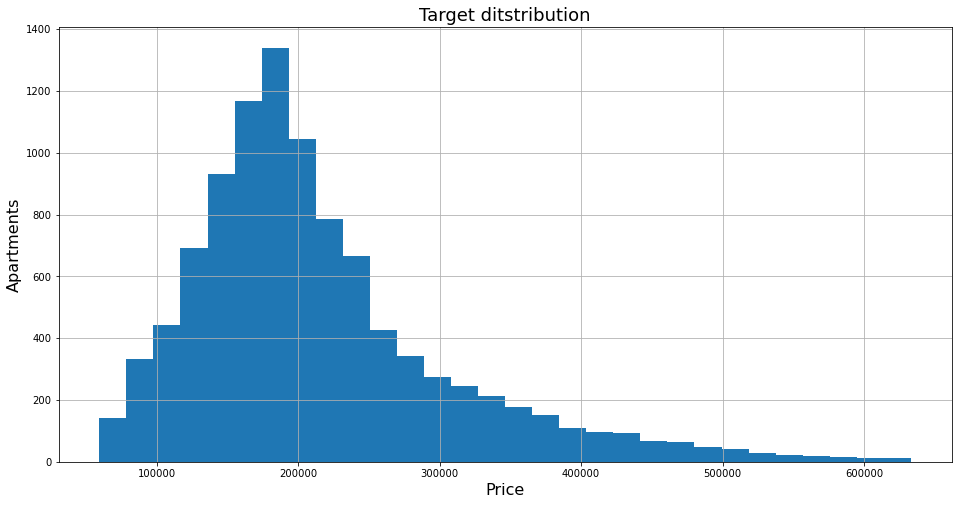

In [13]:
plt.figure(figsize=(16, 8))
train_df['Price'].hist(bins=30)
plt.xlabel('Price', fontsize=16)
plt.ylabel('Apartments', fontsize=16)
plt.title('Target ditstribution', fontsize=18)
plt.show()

#### ~ Quantitative variables

In [14]:
train_df.describe()

,Id,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


#### ~ Nominative variables

In [15]:
train_df.select_dtypes(include='object').columns.tolist()

['DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [16]:
train_df['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
199      1
117      1
207      1
209      1
174      1
Name: DistrictId, Length: 205, dtype: int64

In [17]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [18]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [19]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

### 2. Processing of emissions

#### Rooms

In [20]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [21]:
# create Rooms_outlier
train_df['Rooms_outlier'] = 0
train_df.loc[(train_df['Rooms'] == 0) | (train_df['Rooms'] >= 6), 'Rooms_outlier'] = 1
train_df.groupby(['Rooms_outlier'])['Rooms'].value_counts()

Rooms_outlier  Rooms
0              2.0      3880
               1.0      3705
               3.0      2235
               4.0       150
               5.0        18
1              0.0         8
               10.0        2
               6.0         1
               19.0        1
Name: Rooms, dtype: int64

In [22]:
# replacement 0 by 1 room
train_df.loc[train_df['Rooms'] == 0, 'Rooms'] = 1

# replacement rooms >= 6
train_df.loc[train_df['Rooms'] >= 6, 'Rooms'] = train_df['Rooms'].median()
train_df['Rooms'].value_counts()

2.0    3884
1.0    3713
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

In [23]:
# mean_square_rooms (col)
mean_square_rooms = train_df.groupby('DistrictId')[['Rooms', 'Square']].sum()
mean_square_rooms = pd.DataFrame(mean_square_rooms['Square'] / mean_square_rooms['Rooms'])
mean_square_rooms.rename(columns={0: 'MeanValueRooms'}, inplace=True)
train_df = train_df.merge(mean_square_rooms, on=['DistrictId'])

#### HouseFloor

In [24]:
# if HouseFloor == 0 --> HouseFloor = Floor
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df[train_df['HouseFloor'] == 0]['Floor']

#### Floor

In [25]:
# if Floor > HouseFloor --> Floor = HouseFloor
train_df.loc[train_df['Floor'] > train_df['HouseFloor'], 'Floor'] \
= train_df[train_df['Floor'] > train_df['HouseFloor']]['HouseFloor']

#### HouseYear

In [26]:
train_df.loc[(train_df['HouseYear'] < 1900), 'HouseYear'] = int(train_df['HouseYear'].median())
train_df.loc[(train_df['HouseYear'] > 2020), 'HouseYear'] = 2020

#### Square

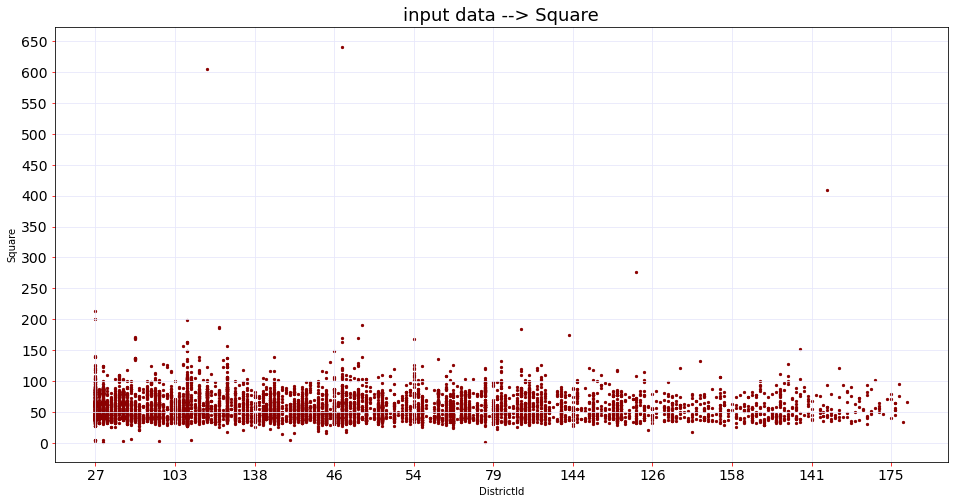

In [27]:
chart_scatter_standart('DistrictId', 'Square', 'input data --> Square')

In [28]:
# Exclude with help chart emissions > 250
train_df.loc[train_df['Square'] > 250, 'Square'] = train_df['Square'].median()
train_df['Square'] = train_df['Square'].round(0).astype(int)

# The smallest apartments in Moscow --> 8.3 m^2 (to use 8)
train_df.loc[train_df['Square'] < 8, 'Square'] = 8

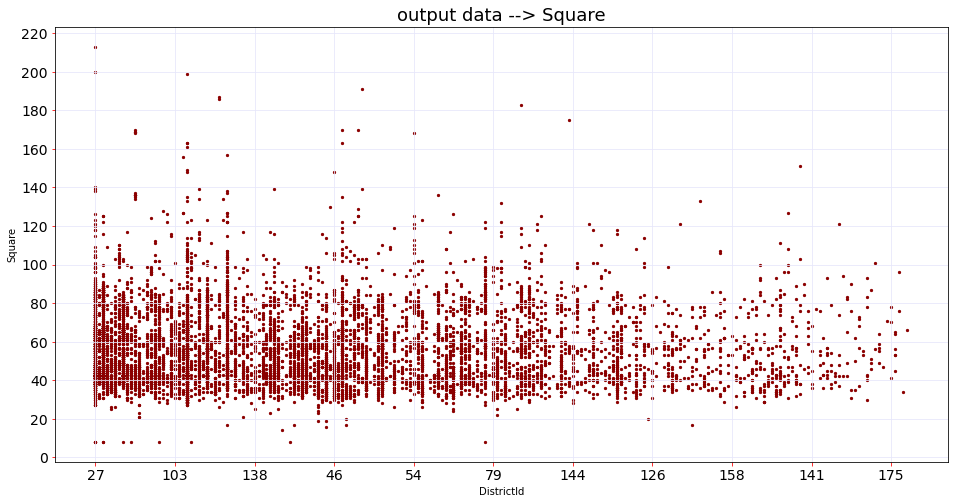

In [29]:
chart_scatter_standart('DistrictId', 'Square', 'output data --> Square', 20, 20)

#### KitchenSquare

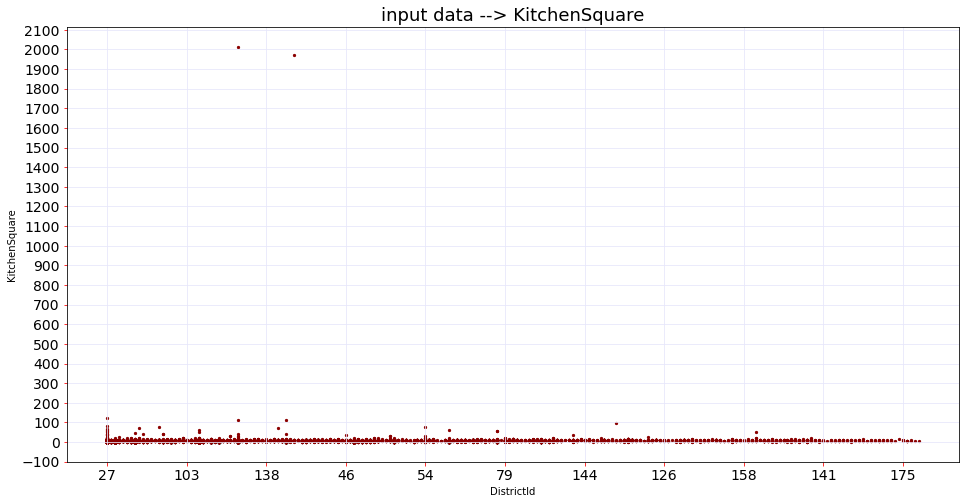

In [30]:
chart_scatter_standart('DistrictId', 'KitchenSquare', 'input data --> KitchenSquare', 20, 100)

In [31]:
print('before rows: ', train_df.shape[0])
train_df = train_df[train_df['KitchenSquare'] < 200]
print('after rows: ', train_df.shape[0])

before rows:  10000
after rows:  9998


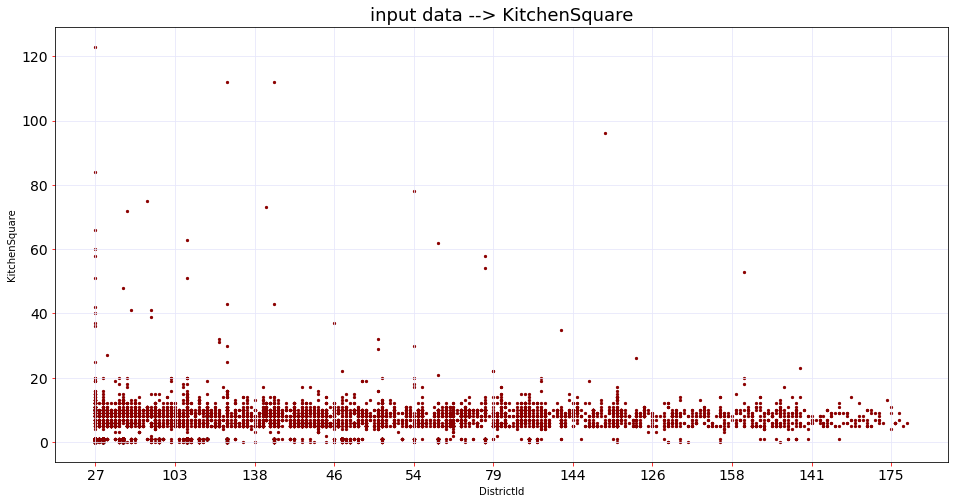

In [32]:
chart_scatter_standart('DistrictId', 'KitchenSquare', 'input data --> KitchenSquare', 20, 20)

#### LifeSquare

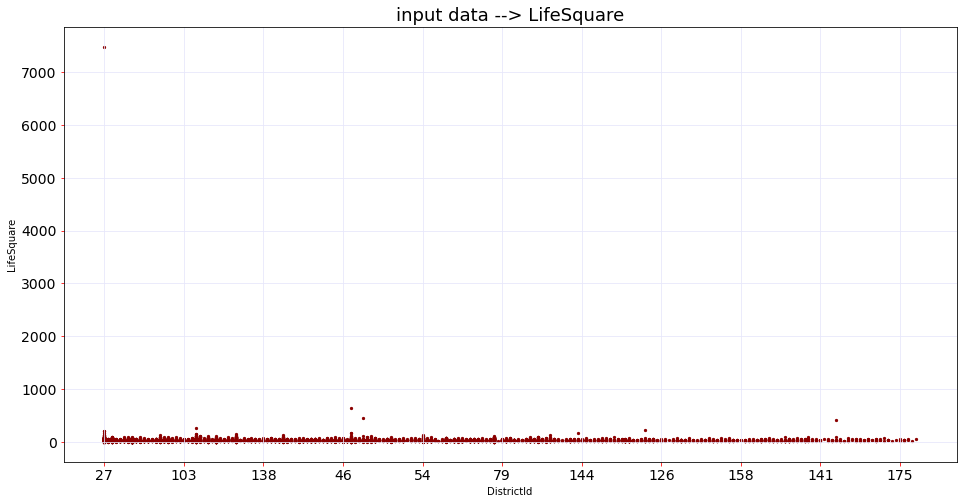

In [33]:
chart_scatter_standart('DistrictId', 'LifeSquare', 'input data --> LifeSquare', 20, 1000)

In [34]:
# find LifeSquare > Square - KitchenSquare
train_df.loc[train_df['LifeSquare'] > train_df['Square'] - train_df['KitchenSquare'] - 3, 'LifeSquare'] \
= train_df['Square'] - train_df['KitchenSquare'] - 3

train_df['LifeSquare']

0             NaN
1             NaN
2       45.000000
3             NaN
4       22.682321
          ...    
9995    45.960026
9996    44.872616
9997    62.377052
9998    18.101125
9999    48.988726
Name: LifeSquare, Length: 9998, dtype: float64

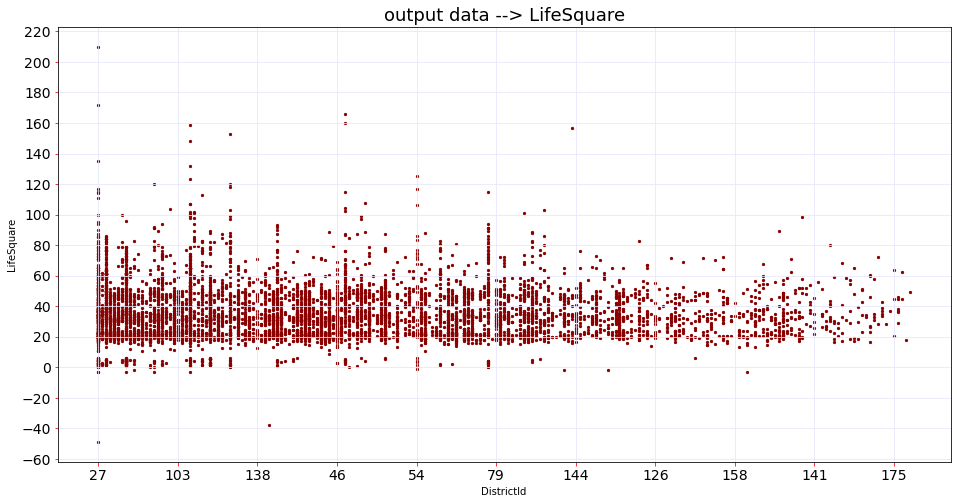

In [35]:
chart_scatter_standart('DistrictId', 'LifeSquare', 'output data --> LifeSquare', 20, 20)

## 2. NaN

In [36]:
train_df.describe()

,Id,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Price,Rooms_outlier,MeanValueRooms
count,9998.000000,9998.000000,9998.000000,7885.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,5201.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,8382.150630,1.887778,56.146329,34.942451,5.876075,7.944589,12.854571,1984.870274,0.118873,24.688738,5352.636527,8.040708,1143.000192,1.319164,4.231546,214160.301755,0.001200,30.016979
std,4858.691936,0.811422,19.014157,16.699580,5.174532,5.227727,6.535325,18.415717,0.119031,17.532819,4006.922053,23.834019,1021.592144,1.492958,4.806603,92869.201646,0.034625,3.329397
min,0.000000,1.000000,8.000000,-49.000000,0.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000,19.727229
25%,4168.500000,1.000000,42.000000,22.666701,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153898.495433,0.000000,27.054361
50%,8393.500000,2.000000,53.000000,32.306154,6.000000,7.000000,14.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192290.039215,0.000000,30.030150
75%,12590.750000,2.000000,66.000000,44.345501,9.000000,11.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249161.507295,0.000000,32.764751
max,16798.000000,5.000000,213.000000,210.000000,123.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,1.000000,47.087742


#### LifeSquare

Find ratio lifeSquare / Square; (by districts) \
Ratio will use for replace NaN LifeSquare

In [37]:
# Select rows with normal 'LifeSquare', where LifeSquare <= Square and 'LifeSquare' != NaN
df_ls = train_df[~(train_df['LifeSquare'].isna())]
df_ls.shape

(7885, 22)

In [38]:
# Create ratio lifeSquare / square (for replace NaN LifeSquare) (by DistrictId)
district_sq_mean = df_ls.groupby('DistrictId').mean()['Square']
district_lsq_mean = df_ls.groupby('DistrictId').mean()['LifeSquare']

k_mean_life_square = district_lsq_mean / district_sq_mean

k_mean_life_square = pd.DataFrame(k_mean_life_square)
k_mean_life_square.rename(columns={0: 'MeanLifeSquare'}, inplace=True)

In [39]:
train_df = train_df.merge(k_mean_life_square, on=['DistrictId'])

In [41]:
train_df.loc[(train_df['LifeSquare'].isna()), 'LifeSquare'] = \
train_df.loc[(train_df['LifeSquare'].isna()), 'Square'] * train_df.loc[(train_df['LifeSquare'].isna()), 'MeanLifeSquare']

#### Healthcare_1

In [43]:
train_df.loc[train_df['Healthcare_1'].isna(), 'Healthcare_1'] = train_df['Healthcare_1'].median()

In [46]:
ftrain_df.describe()

,Id,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Price,Rooms_outlier,MeanValueRooms,MeanLifeSquare
count,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,8382.150630,1.887778,56.146329,36.271926,5.876075,7.944589,12.854571,1984.870274,0.118873,24.688738,5352.636527,8.040708,1026.409682,1.319164,4.231546,214160.301755,0.001200,30.016979,0.644796
std,4858.691936,0.811422,19.014157,16.267603,5.174532,5.227727,6.535325,18.415717,0.119031,17.532819,4006.922053,23.834019,746.726701,1.492958,4.806603,92869.201646,0.034625,3.329397,0.053374
min,0.000000,1.000000,8.000000,-49.000000,0.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000,19.727229,0.434036
25%,4168.500000,1.000000,42.000000,24.349449,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153898.495433,0.000000,27.054361,0.607975
50%,8393.500000,2.000000,53.000000,33.235944,6.000000,7.000000,14.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192290.039215,0.000000,30.030150,0.634166
75%,12590.750000,2.000000,66.000000,45.655198,9.000000,11.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249161.507295,0.000000,32.764751,0.670299
max,16798.000000,5.000000,213.000000,210.000000,123.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,1.000000,47.087742,0.784180


In [47]:
train_df.isna().sum()

Id                0
DistrictId        0
Rooms             0
Square            0
LifeSquare        0
KitchenSquare     0
Floor             0
HouseFloor        0
HouseYear         0
Ecology_1         0
Ecology_2         0
Ecology_3         0
Social_1          0
Social_2          0
Social_3          0
Healthcare_1      0
Healthcare_2      0
Shops_1           0
Shops_2           0
Price             0
Rooms_outlier     0
MeanValueRooms    0
MeanLifeSquare    0
dtype: int64

#### ~ class DataPreprocessing

In [51]:
class DataPreprocessing:
    """Preparation of initial data"""
    
    def __init__(self):
        """Class parameters"""
        self.median = None
        
    def fit(self, X):
        """saving statistics"""
        # Calculation of medians
        self.medians = X.median()
        
    def transform(self, X):
        """data transformation"""
        
        # Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
        
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']

        # HouseFloor, Floor
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = X[train_df['HouseFloor'] == 0]['Floor']
        X.loc[X['Floor'] > X['HouseFloor'], 'Floor'] = X[X['Floor'] > X['HouseFloor']]['HouseFloor']
        
        #HouseYear
        X.loc[(X['HouseYear'] < 1900), 'HouseYear'] = int(X['HouseYear'].median())
        X.loc[(X['HouseYear'] > 2020), 'HouseYear'] = 2020

        # Healthcare_1
        X.loc[X['Healthcare_1'].isna(), 'Healthcare_1'] = X['Healthcare_1'].median()
            
        # Square
        ## Exclude with help chart emissions > 250
        X.loc[X['Square'] > 250, 'Square'] = X['Square'].median()
        X['Square'] = X['Square'].round(0).astype(int)

        ## The smallest apartments in Moscow --> 8.3 m^2 (to use 8)
        X.loc[X['Square'] < 8, 'Square'] = 8
        
        # KitchenSquare
        X.loc[X['KitchenSquare'] < 3, 'KitchenSquare'] = 3
        X = X[X['KitchenSquare'] < 200]
        X.loc[X['KitchenSquare'].isna(), 'KitchenSquare'] = X['KitchenSquare'].median()
        
        #LifeSquare
        X.loc[X['LifeSquare'] > (X['Square'] - X['KitchenSquare'] - 3), 'LifeSquare'] \
        = X['Square'] - X['KitchenSquare'] - 3
        
        ## Select rows with 'LifeSquare' != NaN
        X_ls = X[~(X['LifeSquare'].isna())]
        
        ## Create ratio lifeSquare / square (for replace NaN LifeSquare) (by DistrictId)
        district_sq_mean = X_ls.groupby('DistrictId').mean()['Square']
        district_lsq_mean = X_ls.groupby('DistrictId').mean()['LifeSquare']

        k_mean_life_square = district_lsq_mean / district_sq_mean

        k_mean_life_square = pd.DataFrame(k_mean_life_square)
        k_mean_life_square.rename(columns={0: 'MeanLifeSquare'}, inplace=True)
        
        X = X.merge(k_mean_life_square, on=['DistrictId'])
        
        X.loc[(X['LifeSquare'].isna()), 'LifeSquare'] = \
        X.loc[(X['LifeSquare'].isna()), 'Square'] * X.loc[(X['LifeSquare'].isna()), 'MeanLifeSquare']

        
        X.fillna(self.medians, inplace=True)
        
        return X